In [ ]:
!git clone https://github.com/jonbakerfish/TweetScraper.git

Cloning into 'TweetScraper'...
remote: Enumerating objects: 256, done.
remote: Total 256 (delta 0), reused 0 (delta 0), pack-reused 256
Receiving objects: 100% (256/256), 52.53 KiB | 318.00 KiB/s, done.
Resolving deltas: 100% (141/141), done.


In [ ]:
%cd '/content/TweetScraper'

/content/TweetScraper


In [ ]:
!ls

LICENSE  README.md  requirements.txt  scrapy.cfg  TweetScraper


In [ ]:
!pip install -r 'requirements.txt' 

     |████████████████████████████████| 245kB 5.0MB/s 
     |████████████████████████████████| 11.9MB 9.0MB/s 
     |████████████████████████████████| 3.1MB 43.9MB/s 
     |████████████████████████████████| 2.6MB 42.3MB/s 
     |████████████████████████████████| 235kB 46.6MB/s 
     |████████████████████████████████| 61kB 7.5MB/s 
     |████████████████████████████████| 3.2MB 41.2MB/s 
     |████████████████████████████████| 61kB 6.8MB/s 
     |████████████████████████████████| 51kB 6.1MB/s 
  Created wheel for mysql-connector: filename=mysql_connector-2.2.9-cp36-cp36m-linux_x86_64.whl size=247950 sha256=34e9474bfa4a558bd798427674a5eb0a626a26e1ba29524bb639c634d2ae6766
  Stored in directory: /root/.cache/pip/wheels/8c/83/a1/f8b6d4bb1bd6208bbde1608bbfa7557504bed9eaf2ecf8c175
  Created wheel for protego: filename=Protego-0.1.16-cp36-none-any.whl size=7765 sha256=dbc003940ed99b5e2b3e5593127ed63fa0e598cbe89bcb8604dd3d26cdb8b09a
  Stored in directory: /root/.cache/pip/wheels/51/01/d1/4a2286a

In [ ]:
!scrapy list

TweetScraper


In [ ]:
!scrapy crawl TweetScraper -a query="#Reliance since: 2020-09-09 until: 2020-09-12"

2020-09-16 03:15:26 [scrapy.utils.log] INFO: Scrapy 2.3.0 started (bot: TweetScraper)
2020-09-16 03:15:26 [scrapy.utils.log] INFO: Versions: lxml 4.2.6.0, libxml2 2.9.8, cssselect 1.1.0, parsel 1.6.0, w3lib 1.22.0, Twisted 20.3.0, Python 3.6.9 (default, Jul 17 2020, 12:50:27) - [GCC 8.4.0], pyOpenSSL 19.1.0 (OpenSSL 1.1.1g  21 Apr 2020), cryptography 3.1, Platform Linux-4.19.112+-x86_64-with-Ubuntu-18.04-bionic
2020-09-16 03:15:26 [scrapy.crawler] INFO: Overridden settings:
{'BOT_NAME': 'TweetScraper',
 'LOG_LEVEL': 'INFO',
 'NEWSPIDER_MODULE': 'TweetScraper.spiders',
 'SPIDER_MODULES': ['TweetScraper.spiders'],
 'USER_AGENT': 'TweetScraper'}
2020-09-16 03:15:26 [scrapy.extensions.telnet] INFO: Telnet Password: 234507b6ab3ae4af
2020-09-16 03:15:26 [scrapy.middleware] INFO: Enabled extensions:
['scrapy.extensions.corestats.CoreStats',
 'scrapy.extensions.telnet.TelnetConsole',
 'scrapy.extensions.memusage.MemoryUsage',
 'scrapy.extensions.logstats.LogStats']
2020-09-16 03:15:26 [scrapy.

In [ ]:
!pip install pytrends

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader

# For time stamps
from datetime import datetime

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
stock_list = ['RELIANCE.NS', 'HDFCBANK.NS', 'TCS.NS', 'M&M.NS']

# Set up End and Start times for data
end = datetime.now()
start = datetime(end.year-1, end.month-2, end.day)
endDay=datetime(end.year, end.month, end.day-4)
mainDataframe={}

#For loop for grabing yahoo finance data
for stock in stock_list:   
    # Set DataFrame as the Stock Ticker
    mainDataframe[stock] = DataReader(stock, 'yahoo', start, endDay)

In [ ]:
mainDataframe['RELIANCE.NS']

,High,Low,Open,Close,Volume,Adj Close,Trend
Date,,,,,,,
2019-07-16,1294.900024,1277.050049,1279.949951,1293.000000,4604019.0,1281.135498,0
2019-07-17,1297.000000,1280.000000,1294.300049,1281.849976,4334958.0,1270.087646,0
2019-07-18,1286.400024,1258.000000,1282.000000,1261.849976,5459896.0,1250.271240,0
2019-07-19,1272.949951,1242.699951,1268.199951,1249.000000,7468515.0,1237.539185,34
2019-07-22,1284.500000,1227.300049,1251.000000,1280.500000,13300153.0,1268.750122,34
...,...,...,...,...,...,...,...
2020-09-07,2105.750000,2044.250000,2084.000000,2082.649902,10119064.0,2082.649902,100
2020-09-08,2121.000000,2080.500000,2092.000000,2107.100098,12643749.0,2107.100098,0
2020-09-09,2167.800049,2081.449951,2085.000000,2161.350098,25525961.0,2161.350098,0


In [ ]:
#Get Google Trends
from pytrends import dailydata
dframe = dailydata.get_daily_data('Reliance Limited', end.year-1, end.month-3, end.year, end.month)

Reliance Limited:2019-06-01 2019-06-30
Reliance Limited:2019-07-01 2019-07-31
Reliance Limited:2019-08-01 2019-08-31
Reliance Limited:2019-09-01 2019-09-30
Reliance Limited:2019-10-01 2019-10-31
Reliance Limited:2019-11-01 2019-11-30
Reliance Limited:2019-12-01 2019-12-31
Reliance Limited:2020-01-01 2020-01-31
Reliance Limited:2020-02-01 2020-02-29
Reliance Limited:2020-03-01 2020-03-31
Reliance Limited:2020-04-01 2020-04-30
Reliance Limited:2020-05-01 2020-05-31
Reliance Limited:2020-06-01 2020-06-30
Reliance Limited:2020-07-01 2020-07-31
Reliance Limited:2020-08-01 2020-08-31
Reliance Limited:2020-09-01 2020-09-30


In [ ]:
dframe

,Reliance Limited_unscaled,Reliance Limited_monthly,isPartial,scale,Reliance Limited
date,,,,,
2019-06-01,0,NaN,NaN,NaN,NaN
2019-06-02,58,27.0,False,0.27,15.66
2019-06-03,0,27.0,NaN,0.27,0.00
2019-06-04,0,27.0,NaN,0.27,0.00
2019-06-05,50,27.0,NaN,0.27,13.50
...,...,...,...,...,...
2020-09-09,0,34.0,NaN,0.34,0.00
2020-09-10,0,34.0,NaN,0.34,0.00
2020-09-11,58,34.0,NaN,0.34,19.72


In [ ]:
dframe['Date']=[str(j).split()[0] for j in dframe.index]

In [ ]:
dframe

,Reliance Limited_unscaled,Reliance Limited_monthly,isPartial,scale,Reliance Limited,Date
date,,,,,,
2019-06-01,0,NaN,NaN,NaN,NaN,2019-06-01
2019-06-02,58,27.0,False,0.27,15.66,2019-06-02
2019-06-03,0,27.0,NaN,0.27,0.00,2019-06-03
2019-06-04,0,27.0,NaN,0.27,0.00,2019-06-04
2019-06-05,50,27.0,NaN,0.27,13.50,2019-06-05
...,...,...,...,...,...,...
2020-09-09,0,34.0,NaN,0.34,0.00,2020-09-09
2020-09-10,0,34.0,NaN,0.34,0.00,2020-09-10
2020-09-11,58,34.0,NaN,0.34,19.72,2020-09-11


In [ ]:
mainDataframe[stock_list[0]]['Trend']=[dframe['Reliance Limited_unscaled'][list(dframe['Date']).index(str(j).split()[0])] for j in mainDataframe[stock_list[0]].index]

In [ ]:
mainDataframe[stock_list[0]].shape

(286, 7)

In [ ]:
#Moving Average

ma_day = [20, 30, 50]

for ma in ma_day:
    for k,v in mainDataframe.items():
        column_name = f"MA for {ma} days"
        mainDataframe[k][column_name] = v['Adj Close'].rolling(ma).mean()

In [ ]:
mainDataframe[stock_list[0]]

,High,Low,Open,Close,Volume,Adj Close,Trend,MA for 20 days,MA for 30 days,MA for 50 days
Date,,,,,,,,,,
2019-07-16,1294.900024,1277.050049,1279.949951,1293.000000,4604019.0,1281.135498,0,NaN,NaN,NaN
2019-07-17,1297.000000,1280.000000,1294.300049,1281.849976,4334958.0,1270.087646,0,NaN,NaN,NaN
2019-07-18,1286.400024,1258.000000,1282.000000,1261.849976,5459896.0,1250.271240,0,NaN,NaN,NaN
2019-07-19,1272.949951,1242.699951,1268.199951,1249.000000,7468515.0,1237.539185,34,NaN,NaN,NaN
2019-07-22,1284.500000,1227.300049,1251.000000,1280.500000,13300153.0,1268.750122,34,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2020-09-07,2105.750000,2044.250000,2084.000000,2082.649902,10119064.0,2082.649902,100,2106.382532,2108.813363,2022.474524
2020-09-08,2121.000000,2080.500000,2092.000000,2107.100098,12643749.0,2107.100098,0,2105.047534,2106.460034,2030.662019
2020-09-09,2167.800049,2081.449951,2085.000000,2161.350098,25525961.0,2161.350098,0,2106.735034,2108.616707,2039.267021


In [ ]:
#Wikipedia API Count
import requests
#from nsetools import Nse
from datetime import datetime
from dateutil.relativedelta import relativedelta

# nse=Nse()

# #All Stocks
# def stocks():
#   all_stock_codes = nse.get_stock_codes()
#   return all_stock_codes

#formattedDate
def dateFormatted(dateToday):
  date=str(dateToday).split(" ")[0]
  formattedTodayDate="".join(date.split("-"))
  #formattedTodayDate=str(dateToday.year)+str(dateToday.month if dateToday.month>9 else "0"+str(dateToday.month))+str(dateToday.day if dateToday.day>9 else "0"+str(dateToday.day))
  return formattedTodayDate


#daily Count
def dailyCount(today,query_page):
  formmatedUrl="https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/{}/daily/{}/{}".format(query_page,today,today)
  dayCount=requests.get(formmatedUrl)
  return dayCount


#date
def dates():
  dateToday=dateFormatted(datetime.today())
  prevDate=dateFormatted(datetime.today()- relativedelta(days=1))
  return [dateToday,prevDate]

#engine
def wikipedia():
  #stock=stocks()
  name='Reliance_Industries_Limited'
  #name='Tata_Consultancy_Services_Limited'
  views=[]
  for i in range(len(mainDataframe[stock_list[0]])):
    date=list(mainDataframe[stock_list[0]].index)[i]
    date=dateFormatted(date)
    out=dailyCount(date,name)
    try:
      views.append(out.json()['items'][0]['views'])
    except Exception as e:
      print(e)
      print(out.json())

  mainDataframe[stock_list[0]]['Views']=views


wikipedia()

In [ ]:
df=mainDataframe[stock_list[0]]
df.tail()

,High,Low,Open,Close,Volume,Adj Close,Trend,MA for 20 days,MA for 30 days,MA for 50 days,Views
Date,,,,,,,,,,,
2020-09-07,2105.750000,2044.250000,2084.000000,2082.649902,10119064.0,2082.649902,100,2106.382532,2108.813363,2022.474524,350
2020-09-08,2121.000000,2080.500000,2092.000000,2107.100098,12643749.0,2107.100098,0,2105.047534,2106.460034,2030.662019,331
2020-09-09,2167.800049,2081.449951,2085.000000,2161.350098,25525961.0,2161.350098,0,2106.735034,2108.616707,2039.267021,415
2020-09-10,2344.949951,2175.350098,2183.100098,2314.000000,64750460.0,2314.000000,0,2116.332532,2115.455037,2050.340022,572
2020-09-11,2337.850098,2287.100098,2312.000000,2319.750000,27445768.0,2319.750000,58,2126.630029,2123.876701,2060.977021,462


# Formulas for the generated features
- Functions

In [ ]:
#n means the time periods, Vt means the data point at period t.

In [ ]:
#1
#Moving Average
# MA(n)t = Vt/n + Vt−1/n + ···+ Vt−n+1/n


In [ ]:
def movingAverage(df,colname,n,name):
  df['MA'+name]=df[colname].rolling(window=n).mean()
  return df

In [ ]:
#2
#Exponential moving average
#EMA(n)t = (Vt − (MA(n)t−1)) × ( 2/(n + 1)) + (MA(n)t−1)
#Exponential weighted moving average

In [ ]:
def movingExponentialAverage(df,colname,n,name):
  df['EMA'+name]=[(df[colname][i]-df['MA'+name][i-1])*(2/(n+1))+ df['MA'+name][i-1] if i>1 else float('nan') for i in range(len(df))]
  return df


In [ ]:
#3
#Disparity
#Disparity(n)t = Vt/MA(n)t× 100

In [ ]:
def disparity(df,colname,name):
  df['Disparity'+name]=[df[colname][i]/(df['MA'+name][i] if df['MA'+name][i]!=0 else 1) for i in range(len(df))]
  return df

In [ ]:
#4
#Momentum1
#Momentum1t = (Vt/(Vt−5))× 100 'or' (Vt/(Vt−3))× 100


In [ ]:
def momentum1(df,colname,name):
  df['Momentum1'+name]=[float('nan') for i in range(3)]+[((df[colname][i])/    (df[colname][i-3]) if (df[colname][i-3])!=0 else 1    )*100 for i in range(3,len(df))]
  return df

In [ ]:
#5
#Momentum2
#Momentum2t = (Vt -(Vt−5))× 100

In [ ]:
def momentum2(df,colname,name):
  df['Momentum2'+name]=[float('nan') for i in range(5)]+[((df[colname][i])-(df[colname][i-5]))*100 for i in range(5,len(df))]
  return df

In [ ]:
#6
#Rate Of Change:
#ROCt = (Vt/Momentum2t)× 100

In [ ]:
def roct(df,colname,name):
  df['Roct'+name]=[float('nan') for i in range(5)]+[((df[colname][i])/((df['Momentum2'+name][i]) +0 if df['Momentum2'+name][i]!=0 else 1) )*100 for i in range(5,len(df))]
  return df

In [ ]:
#7
#Relative Strength Index:
# RSI(n) = 100 − 100/(1 + (AverageGain(n)/AverageLoss(n)))

In [ ]:
!pip install --upgrade ta

  Created wheel for ta: filename=ta-0.5.25-cp36-none-any.whl size=24880 sha256=7434e793ec068540f991cbc39cbb2a42a494fce2ba6c53e29b22f9ae5389448a
  Stored in directory: /root/.cache/pip/wheels/2e/93/b7/cf649194508e53cee4145ffb949e9f26877a5a8dd12db9ed5b
Successfully built ta


In [ ]:
import ta
def rsi(df,colname,name):
  df['RSI'+name]=ta.momentum.RSIIndicator(close=df[colname], n = 14, fillna = False).rsi()
  return df

In [ ]:
#Stochastic Oscillator
def so(df,name):
  df['SO'+name]=ta.momentum.StochasticOscillator(high=df['High'], low=df['Low'], close=df['Close'], n = 14, d_n = 3, fillna = False).stoch()
  return df 


In [ ]:
#William R
def william(df,name):
  df['William'+name]=ta.momentum.WilliamsRIndicator(high=df['High'], low=df['Low'], close=df['Close'], lbp = 14, fillna = False).wr()
  return df 


In [ ]:
#Atr
def atr(df,name):
  df['Atr'+name]=ta.volatility.AverageTrueRange(high=df['High'], low=df['Low'], close=df['Close'], n = 14, fillna = False).average_true_range()
  return df 

In [ ]:
#Bollinger Band
def bb(df,name):
  df['Bb'+name]=ta.volatility.BollingerBands(close=df['Close'],n=14,ndev=2, fillna = False).bollinger_mavg()
  return df 

In [ ]:
df=mainDataframe[stock_list[0]]

In [ ]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close,Trend,MA for 20 days,MA for 30 days,MA for 50 days,Views
Date,,,,,,,,,,,
2020-09-07,2105.750000,2044.250000,2084.000000,2082.649902,10119064.0,2082.649902,100,2106.382532,2108.813363,2022.474524,350
2020-09-08,2121.000000,2080.500000,2092.000000,2107.100098,12643749.0,2107.100098,0,2105.047534,2106.460034,2030.662019,331
2020-09-09,2167.800049,2081.449951,2085.000000,2161.350098,25525961.0,2161.350098,0,2106.735034,2108.616707,2039.267021,415
2020-09-10,2344.949951,2175.350098,2183.100098,2314.000000,64750460.0,2314.000000,0,2116.332532,2115.455037,2050.340022,572
2020-09-11,2337.850098,2287.100098,2312.000000,2319.750000,27445768.0,2319.750000,58,2126.630029,2123.876701,2060.977021,462


In [ ]:
df=movingAverage(df,'Views',3,'0')
df=movingAverage(df,'Trend',3,'1')

In [ ]:
df=movingExponentialAverage(df,'Views',3,'0')
df=movingExponentialAverage(df,'Trend',3,'1')

In [ ]:
df=disparity(df,'Views','0')
df=disparity(df,'Trend','1')

In [ ]:
df=momentum1(df,'Views','0')
df=momentum1(df,'Trend','1')

In [ ]:
df=momentum2(df,'Views','0')
df=momentum2(df,'Trend','1')

In [ ]:
df=roct(df,'Views','0')
df=roct(df,'Trend','1')

In [ ]:
df=rsi(df,'Views','0')
df=rsi(df,'Trend','1')
df=rsi(df,'Close','2')

In [ ]:
df=so(df,'1')

In [ ]:
df=william(df,'1')

In [ ]:
df=atr(df,'1')

In [ ]:
df=bb(df,'1')

In [ ]:
df=df.iloc[50:,:]

In [ ]:
df.head(7)

,High,Low,Open,Close,Volume,Adj Close,Trend,MA for 20 days,MA for 30 days,MA for 50 days,Views
Date,,,,,,,,,,,
2019-07-16,1294.900024,1277.050049,1279.949951,1293.000000,4604019.0,1281.135498,0,NaN,NaN,NaN,2273
2019-07-17,1297.000000,1280.000000,1294.300049,1281.849976,4334958.0,1270.087646,0,NaN,NaN,NaN,2530
2019-07-18,1286.400024,1258.000000,1282.000000,1261.849976,5459896.0,1250.271240,0,NaN,NaN,NaN,2725
2019-07-19,1272.949951,1242.699951,1268.199951,1249.000000,7468515.0,1237.539185,34,NaN,NaN,NaN,2970
2019-07-22,1284.500000,1227.300049,1251.000000,1280.500000,13300153.0,1268.750122,34,NaN,NaN,NaN,2641
2019-07-23,1293.900024,1260.400024,1285.000000,1273.550049,9287951.0,1261.864014,33,NaN,NaN,NaN,2814
2019-07-24,1278.800049,1253.550049,1273.500000,1259.099976,6943982.0,1247.546387,0,NaN,NaN,NaN,2953


In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import pandas_datareader as web

In [ ]:
corr = df.corr(method='pearson')
corr

,High,Low,Open,Close,Volume,Adj Close,Trend,MA for 20 days,MA for 30 days,MA for 50 days,Views
High,1.000000,0.995281,0.996022,0.997967,0.269215,0.998037,0.007510,0.946945,0.908973,0.819218,-0.637241
Low,0.995281,1.000000,0.997591,0.996897,0.194455,0.996764,0.014934,0.945462,0.905381,0.809881,-0.633748
Open,0.996022,0.997591,1.000000,0.994026,0.216770,0.994000,0.012738,0.948056,0.908964,0.816090,-0.637598
Close,0.997967,0.996897,0.994026,1.000000,0.239250,0.999979,0.008978,0.944731,0.905940,0.813518,-0.635619
Volume,0.269215,0.194455,0.216770,0.239250,1.000000,0.240898,-0.034940,0.131550,0.103025,0.076972,0.068112
Adj Close,0.998037,0.996764,0.994000,0.999979,0.240898,1.000000,0.009138,0.945178,0.906671,0.814917,-0.636344
Trend,0.007510,0.014934,0.012738,0.008978,-0.034940,0.009138,1.000000,-0.011497,0.007666,0.003535,0.082044
MA for 20 days,0.946945,0.945462,0.948056,0.944731,0.131550,0.945178,-0.011497,1.000000,0.987834,0.926198,-0.712070
MA for 30 days,0.908973,0.905381,0.908964,0.905940,0.103025,0.906671,0.007666,0.987834,1.000000,0.966667,-0.732741
MA for 50 days,0.819218,0.809881,0.816090,0.813518,0.076972,0.814917,0.003535,0.926198,0.966667,1.000000,-0.701091


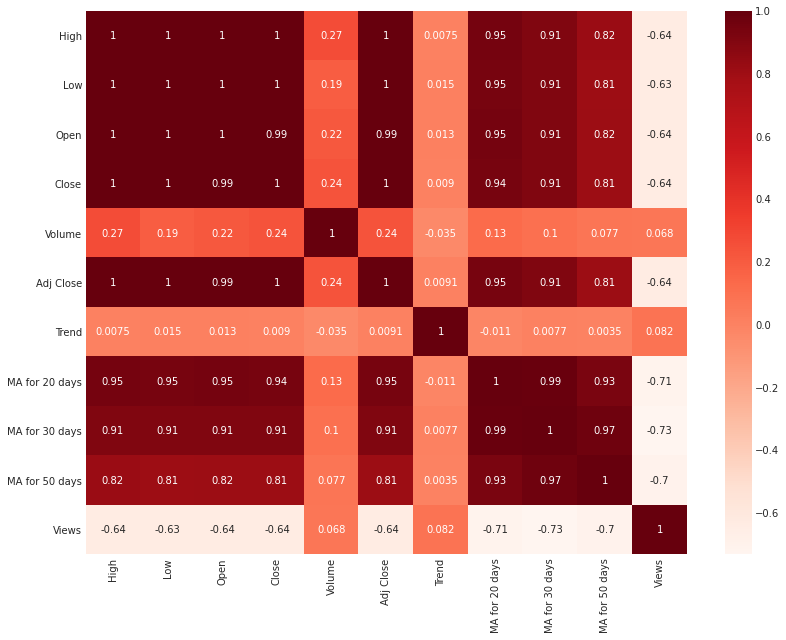

In [ ]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [ ]:
#Correlation with output variable
cor_target = abs(cor["Close"])
#Selecting less correlated features
relevant_features = cor_target[cor_target>0.6]
relevant_features

High              0.997967
Low               0.996897
Open              0.994026
Close             1.000000
Adj Close         0.999979
MA for 20 days    0.944731
MA for 30 days    0.905940
MA for 50 days    0.813518
Views             0.635619
Name: Close, dtype: float64

In [ ]:
#Correlation with output variable
cor_target = abs(cor["Views"])
#Selecting less correlated features
relevant_features = cor_target[cor_target>0.6]
relevant_features

High              0.637241
Low               0.633748
Open              0.637598
Close             0.635619
Adj Close         0.636344
MA for 20 days    0.712070
MA for 30 days    0.732741
MA for 50 days    0.701091
Views             1.000000
Name: Views, dtype: float64

In [ ]:
#Correlation with output variable
cor_target = abs(cor["Trend"])
#Selecting less correlated features
relevant_features = cor_target[cor_target>0.6]
relevant_features


Trend    1.0
Name: Trend, dtype: float64

In [ ]:
#parameters=['Close','High','Low','Open','Volume','Adj Close','Trend','Views','MA for 30 days','MA for 50 days''MA for 20 days','MA0','EMA0','RSI0','William1','SO1','Atr1','Bb1']#['Close','High','Low','Open','Volume','Adj Close','Trend','Views','MA for 30 days','MA for 50 days''MA for 20 days','MA0','EMA0','RSI0','Momentum10','Momentum20','Disparity0','William1','MA1','EMA1','RSI1','Momentum11','Momentum21','Disparity1','SO1']#'Roct' #['High','Low','Open','Close','Volume','Adj Close']#['High','Low','Open','Close','Volume','Adj Close','Views','MA for 50 days','MA','EMA','Disparity','Momentum1','Momentum2']  #['High','Low','Open','Volume','Views'] #['High','Low','Open','Close','Volume','Adj Close','Views'] 

In [ ]:
# Below paramter is as of research paper for target-3

In [ ]:
parameters=['Close','Open','High','Volume','Adj Close','So1','Momentum10','Views','MA0','EMA0','Roct0','EMA1','Disparity1','Roct1','RSI1','Disparity0','RSI2','RSI0','Trend','MA1','William1','Atr1','Bb1']

In [ ]:
#parameters=['Close','Open','High','Volume','Adj Close','Momentum10','Views','MA0','EMA0','Roct0','Disparity0','RSI2','RSI0','William1','Atr1','Bb1']

In [ ]:
#parameters=['Close','Open','High','Volume','Adj Close','William1','Atr1','Bb1','RSI2']

In [ ]:
df

,High,Low,Open,Close,Volume,Adj Close,Trend,MA for 20 days,MA for 30 days,MA for 50 days,Views
Date,,,,,,,,,,,
2019-07-16,1294.900024,1277.050049,1279.949951,1293.000000,4604019.0,1281.135498,0,NaN,NaN,NaN,2273
2019-07-17,1297.000000,1280.000000,1294.300049,1281.849976,4334958.0,1270.087646,0,NaN,NaN,NaN,2530
2019-07-18,1286.400024,1258.000000,1282.000000,1261.849976,5459896.0,1250.271240,0,NaN,NaN,NaN,2725
2019-07-19,1272.949951,1242.699951,1268.199951,1249.000000,7468515.0,1237.539185,34,NaN,NaN,NaN,2970
2019-07-22,1284.500000,1227.300049,1251.000000,1280.500000,13300153.0,1268.750122,34,NaN,NaN,NaN,2641
...,...,...,...,...,...,...,...,...,...,...,...
2020-09-07,2105.750000,2044.250000,2084.000000,2082.649902,10119064.0,2082.649902,100,2106.382532,2108.813363,2022.474524,350
2020-09-08,2121.000000,2080.500000,2092.000000,2107.100098,12643749.0,2107.100098,0,2105.047534,2106.460034,2030.662019,331
2020-09-09,2167.800049,2081.449951,2085.000000,2161.350098,25525961.0,2161.350098,0,2106.735034,2108.616707,2039.267021,415


In [ ]:
data=df.filter(parameters)

In [ ]:
df['Close1']=df['Close']

In [ ]:
data = df

In [ ]:
data['Close']=data['Close'].shift(-1)
#data['Adj Close']=data['Adj Close'].shift(-1)

In [ ]:
data=data.iloc[:-1,:]
data.tail()

,High,Low,Open,Close,Volume,Adj Close,Trend,MA for 20 days,MA for 30 days,MA for 50 days,Views,Close1
Date,,,,,,,,,,,,
2020-09-04,2096.949951,2072.199951,2083.550049,2082.649902,13141644.0,2077.250000,0,2108.242542,2111.265031,2015.155608,382,2077.250000
2020-09-07,2105.750000,2044.250000,2084.000000,2107.100098,10119064.0,2082.649902,100,2106.382532,2108.813363,2022.474524,350,2082.649902
2020-09-08,2121.000000,2080.500000,2092.000000,2161.350098,12643749.0,2107.100098,0,2105.047534,2106.460034,2030.662019,331,2107.100098
2020-09-09,2167.800049,2081.449951,2085.000000,2314.000000,25525961.0,2161.350098,0,2106.735034,2108.616707,2039.267021,415,2161.350098
2020-09-10,2344.949951,2175.350098,2183.100098,2319.750000,64750460.0,2314.000000,0,2116.332532,2115.455037,2050.340022,572,2314.000000


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_data = pd.DataFrame(scaler.fit_transform(data))

In [ ]:
# Train Test Split, Accuracy

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(scaled_data.iloc[:,1:], scaled_data.iloc[:,0], test_size=0.1,shuffle=False)

In [ ]:
Y_train

0      0.312182
1      0.293132
2      0.297416
3      0.295361
4      0.296754
         ...   
207    0.882183
208    0.865362
209    0.870690
210    0.879292
211    0.860765
Name: 0, Length: 212, dtype: float64

In [ ]:
#Actual Data 
Y_test

212    0.870481
213    0.866163
214    0.862297
215    0.856551
216    0.840914
217    0.859859
218    0.868914
219    0.844884
220    0.834297
221    0.843979
222    0.834471
223    0.872919
224    0.854322
225    0.858188
226    0.833496
227    0.838058
228    0.866581
229    0.855367
230    0.831093
231    0.834854
232    0.851884
233    0.889671
234    0.995995
235    1.000000
Name: 0, dtype: float64

In [ ]:
from sklearn.ensemble import RandomForestRegressor
clf = RandomForestRegressor()
clf.fit(X_train, Y_train)
prediction = (clf.predict(X_test))


#Predicted Data
prediction

array([0.84908499, 0.8518004 , 0.84605074, 0.84206108, 0.84247582,
       0.83345827, 0.83973256, 0.84613466, 0.83156825, 0.81951281,
       0.82524311, 0.82708194, 0.84967196, 0.8414373 , 0.83324583,
       0.83639515, 0.82890787, 0.83491839, 0.84448185, 0.84258694,
       0.82173855, 0.82273214, 0.84934998, 0.8565489 ])

In [ ]:
len(prediction)

24

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


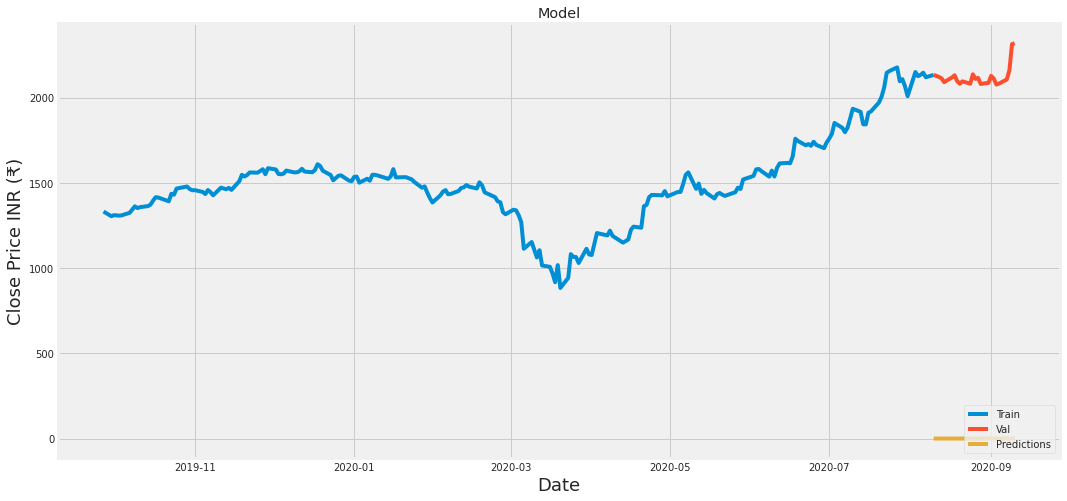

In [ ]:
# Plot the data
training_data_len=int(len(data)*0.9)
train = data[:len(data)-len(prediction)+1]
valid = data[len(data)-len(prediction):]
valid['Predictions'] = prediction
# Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price INR (₹)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [ ]:
#MSE ERROR
from sklearn.metrics import mean_squared_error
mean_squared_error(Y_test, prediction)

0.002305698067343617

In [ ]:
#DIRECTIONAL SYMMETRY
def directional_symmetry(x,y) :
  c = 0
  if len(x) < 2 :
    return("Sorry! Not enough data to calcuate symmetry ")
  xp = x[0]
  yp = y[0]
  for i in range(1, len(x)) :
    if (x[i] >= xp and y[i] >= yp) or (x[i] <= xp and y[i] <= yp) :
      c+=1
    xp = x[i]
    yp = y[i]
  return c*100/(len(x)-1)


In [ ]:
directional_symmetry(list(Y_test), list(prediction))

43.47826086956522

In [ ]:
len(prediction)

In [ ]:

# Technical Analysis Library in Python

In [ ]:
from subprocess import check_output
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from numpy import newaxis

In [ ]:
scaled_data

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.247249,0.308841,0.287118,0.277077,0.004418,0.279359,0.00,NaN,NaN,NaN,0.157518,0.285989
1,0.248754,0.311110,0.298445,0.263147,0.000000,0.271650,0.00,NaN,NaN,NaN,0.177729,0.278192
2,0.241156,0.294183,0.288736,0.254197,0.018473,0.257824,0.00,NaN,NaN,NaN,0.193064,0.264205
3,0.231514,0.282411,0.277843,0.276137,0.051458,0.248941,0.34,NaN,NaN,NaN,0.212331,0.255219
4,0.239794,0.270562,0.264267,0.271296,0.147224,0.270717,0.34,NaN,NaN,NaN,0.186458,0.277247
...,...,...,...,...,...,...,...,...,...,...,...,...
280,0.822216,0.920635,0.921422,0.834854,0.144621,0.834817,0.00,0.990163,0.995828,0.957303,0.008808,0.834435
281,0.828524,0.899130,0.921777,0.851884,0.094985,0.838584,1.00,0.988421,0.993387,0.966185,0.006291,0.838211
282,0.839457,0.927022,0.928092,0.889671,0.136444,0.855644,0.00,0.987170,0.991044,0.976120,0.004797,0.855310
283,0.873006,0.927752,0.922567,0.995995,0.347992,0.893494,0.00,0.988751,0.993191,0.986563,0.011403,0.893248


In [ ]:
data.columns

Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close', 'Trend',
       'MA for 20 days', 'MA for 30 days', 'MA for 50 days', 'Views',
       'Close1'],
      dtype='object')

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.277077,0.247249,0.284388,0.260603,0.004418,0.278242,0.00,NaN,NaN,NaN,0.157518,0.284844
1,0.263147,0.248754,0.286478,0.270884,0.000000,0.270565,0.00,NaN,NaN,NaN,0.177729,0.277077
2,0.254197,0.241156,0.270892,0.262072,0.018473,0.256794,0.00,NaN,NaN,NaN,0.193064,0.263147
3,0.276137,0.231514,0.260052,0.252185,0.051458,0.247946,0.34,NaN,NaN,NaN,0.212331,0.254197
4,0.271296,0.239794,0.249141,0.239862,0.147224,0.269635,0.34,NaN,NaN,NaN,0.186458,0.276137
...,...,...,...,...,...,...,...,...,...,...,...,...
280,0.834854,0.822216,0.847745,0.836330,0.144621,0.831481,0.00,0.982900,0.987547,0.945103,0.008808,0.831093
281,0.851884,0.828524,0.827943,0.836653,0.094985,0.835234,1.00,0.981170,0.985126,0.953872,0.006291,0.834854
282,0.889671,0.839457,0.853626,0.842384,0.136444,0.852225,0.00,0.979929,0.982802,0.963681,0.004797,0.851884
283,0.995995,0.873006,0.854299,0.837369,0.347992,0.889924,0.00,0.981498,0.984932,0.973990,0.011403,0.889671


In [ ]:
scaled_data.shape

(285, 12)

In [ ]:
scaled_data = scaled_data.iloc[9:,:]

In [ ]:
scaled_data

,0,1,2,3,4,5,6,7,8,9,10,11
49,0.312182,0.261658,0.289312,0.269594,0.071895,0.294238,1.0,0.164750,0.129057,0.000000,0.206040,0.296023
50,0.293132,0.276533,0.304580,0.282132,0.118479,0.310300,0.5,0.168943,0.130500,0.001105,0.209107,0.312182
51,0.297416,0.281014,0.295901,0.301476,0.063349,0.291365,0.0,0.171553,0.131382,0.001823,0.191727,0.293132
52,0.295361,0.261443,0.287399,0.264938,0.030350,0.295622,0.0,0.176401,0.131987,0.003161,0.200613,0.297416
53,0.296754,0.271408,0.303376,0.289225,0.041366,0.293580,0.0,0.181356,0.133041,0.004735,0.176313,0.295361
...,...,...,...,...,...,...,...,...,...,...,...,...
280,0.834854,0.822216,0.847745,0.836330,0.144621,0.831481,0.0,0.982900,0.987547,0.945103,0.008808,0.831093
281,0.851884,0.828524,0.827943,0.836653,0.094985,0.835234,1.0,0.981170,0.985126,0.953872,0.006291,0.834854
282,0.889671,0.839457,0.853626,0.842384,0.136444,0.852225,0.0,0.979929,0.982802,0.963681,0.004797,0.851884
283,0.995995,0.873006,0.854299,0.837369,0.347992,0.889924,0.0,0.981498,0.984932,0.973990,0.011403,0.889671


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(scaled_data.iloc[:,1:], scaled_data.iloc[:,0], test_size=0.1,shuffle=False)

In [ ]:
X_train.shape

(212, 11)

In [ ]:
X_test.shape

(24, 11)

In [ ]:
Y_test.shape

(24,)

In [ ]:
X_test.iloc[0].shape

(11,)

In [ ]:
X_train.shape

(212, 11)

In [ ]:
X_Train = np.array(X_train)
Y_Train = np.array(Y_train)
X_Test = np.array(X_test)
Y_Test = np.array(Y_test)
X_Train.reshape(212,11,1)

array([[[0.26165813],
        [0.28931238],
        [0.26959449],
        ...,
        [0.        ],
        [0.20603964],
        [0.29602289]],

       [[0.27653322],
        [0.3045804 ],
        [0.2821321 ],
        ...,
        [0.00110535],
        [0.20910664],
        [0.31218222]],

       [[0.28101367],
        [0.29590138],
        [0.30147585],
        ...,
        [0.00182253],
        [0.19172696],
        [0.29313229]],

       ...,

       [[0.89322201],
        [0.88040665],
        [0.89754979],
        ...,
        [0.67771213],
        [0.00817867],
        [0.86536181]],

       [[0.87293451],
        [0.87296749],
        [0.88895257],
        ...,
        [0.69370274],
        [0.01195344],
        [0.87069032]],

       [[0.86583755],
        [0.88175271],
        [0.86946557],
        ...,
        [0.71017667],
        [0.00896508],
        [0.8792923 ]]])

In [ ]:
Y_Train.reshape(212,1)

array([[0.31218222],
       [0.29313229],
       [0.29741593],
       [0.29536114],
       [0.29675419],
       [0.30695828],
       [0.33342621],
       [0.32635647],
       [0.33011772],
       [0.33440136],
       [0.34011283],
       [0.35693391],
       [0.3707599 ],
       [0.36922758],
       [0.35407817],
       [0.38476002],
       [0.38110327],
       [0.40607373],
       [0.4144668 ],
       [0.40419306],
       [0.39900399],
       [0.39952639],
       [0.39231738],
       [0.38368046],
       [0.40018805],
       [0.3910636 ],
       [0.37873515],
       [0.40973048],
       [0.40307864],
       [0.40872047],
       [0.40060595],
       [0.43581529],
       [0.46221358],
       [0.45521347],
       [0.46141256],
       [0.47189528],
       [0.47098977],
       [0.47767638],
       [0.48495511],
       [0.46465141],
       [0.48927353],
       [0.48397996],
       [0.46573097],
       [0.46444242],
       [0.46726338],
       [0.47959182],
       [0.47217382],
       [0.472

In [ ]:
X_Test.reshape(24,11,1)

array([[[0.87099899],
        [0.87318007],
        [0.89045715],
        [0.13312431],
        [0.86108484],
        [0.51      ],
        [0.92447868],
        [0.84463624],
        [0.72467762],
        [0.01305442],
        [0.86076485]],

       [[0.86741463],
        [0.86768926],
        [0.87304775],
        [0.28370599],
        [0.87077899],
        [0.        ],
        [0.93455966],
        [0.85898941],
        [0.7391464 ],
        [0.01195344],
        [0.87048133]],

       [[0.85666156],
        [0.872259  ],
        [0.86316091],
        [0.1581763 ],
        [0.8664705 ],
        [0.        ],
        [0.94774677],
        [0.87204001],
        [0.75332459],
        [0.00605536],
        [0.86616292]],

       [[0.85228857],
        [0.87452613],
        [0.86817596],
        [0.11699192],
        [0.86261364],
        [0.51      ],
        [0.96070371],
        [0.88394518],
        [0.7664591 ],
        [0.0084146 ],
        [0.86229717]],

       [[0.86526402],
  

In [ ]:
Y_Train.shape

(212,)

In [ ]:
X_Test = X_Test.reshape(24, 11, 1)

In [ ]:
model = Sequential()

model.add(LSTM(
    64,
    input_shape = (11, 1),
    return_sequences=True))


model.add(LSTM(
    128,
    return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(64))
model.add(Dense(32))
model.add(Dense(16))
model.add(Dense(4))
model.add(Dense(1, activation='linear'))
# model.add(Activation('linear'))

model.compile(loss='mse', optimizer='adam')

In [ ]:
X_Train.shape

(212, 11, 1)

In [ ]:
model.fit(
    X_Train,
    Y_Train,
    batch_size=16,
    epochs=10,
    validation_split=0.05)

Epoch 1/10
13/13 [==============================] - 1s 76ms/step - loss: 0.0384 - val_loss: 0.0890
Epoch 2/10
13/13 [==============================] - 0s 18ms/step - loss: 0.0119 - val_loss: 0.0681
Epoch 3/10
13/13 [==============================] - 0s 19ms/step - loss: 0.0087 - val_loss: 0.0076
Epoch 4/10
13/13 [==============================] - 0s 21ms/step - loss: 0.0078 - val_loss: 0.0031
Epoch 5/10
13/13 [==============================] - 0s 21ms/step - loss: 0.0084 - val_loss: 0.0073
Epoch 6/10
13/13 [==============================] - 0s 18ms/step - loss: 0.0083 - val_loss: 0.0028
Epoch 7/10
13/13 [==============================] - 0s 19ms/step - loss: 0.0083 - val_loss: 0.0029
Epoch 8/10
13/13 [==============================] - 0s 20ms/step - loss: 0.0091 - val_loss: 0.0034
Epoch 9/10
13/13 [==============================] - 0s 18ms/step - loss: 0.0065 - val_loss: 0.0048
Epoch 10/10
13/13 [==============================] - 0s 18ms/step - loss: 0.0062 - val_loss: 0.0041


In [ ]:
predicted_value = model.predict(X_Test)

In [ ]:
predicted_value

array([[0.92308646],
       [0.8762218 ],
       [0.8604323 ],
       [0.92985535],
       [0.86980456],
       [0.93023825],
       [1.0060929 ],
       [0.9578067 ],
       [0.86698306],
       [0.9383256 ],
       [0.87392193],
       [0.8624597 ],
       [0.9133123 ],
       [0.95637083],
       [0.9583997 ],
       [1.0593498 ],
       [0.8930686 ],
       [0.96906334],
       [0.96298426],
       [0.8808898 ],
       [1.010503  ],
       [0.8880604 ],
       [0.9299982 ],
       [1.0747014 ]], dtype=float32)

In [ ]:
Y_Test

array([0.87048133, 0.86616292, 0.86229717, 0.85655085, 0.84091391,
       0.85985934, 0.86891415, 0.84488406, 0.83429693, 0.84397855,
       0.83447106, 0.87291917, 0.854322  , 0.85818758, 0.83349582,
       0.83805809, 0.86658073, 0.85536679, 0.83109285, 0.83485401,
       0.85188417, 0.88967061, 0.99599499, 1.        ])

In [ ]:
def directional_symmetry(x,y) :
  c = 0
  if len(x) < 2 :
    return("Sorry! Not enough data to calcuate symmetry ")
  xp = x[0]
  yp = y[0]
  for i in range(1, len(x)) :
    if (x[i] >= xp and y[i] >= yp) or (x[i] <= xp and y[i] <= yp) :
      c+=1
    xp = x[i]
    yp = y[i]
  return c*100/(len(x)-1)

In [ ]:
directional_symmetry(Y_Test, predicted_value)

65.21739130434783

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(Y_Test, predicted_value)

0.008465449575016487